In [1]:
import numpy as np
import pandas as pd
import os
from collections import OrderedDict
import seaborn
from matplotlib import pyplot as plt
import scipy
from functools import reduce
import openpyxl
import pingouin as pg

In [2]:
table_results1 = pd.read_csv('AG1n_1.tif_BA_results.csv')
table_results1

,,Area,Mean,%Area
0,1,0.778,1.172,0.123


In [3]:
area1 = table_results1.loc[0,"Area"]
print(area1)

0.778


In [4]:
table_summary1 = pd.read_csv('AG1n_1.tif_BA_summary.txt', sep='\t')
table_summary1

,Slice,Count,Total Area,Average Size,%Area,Mean
0,Result of 1,24,0.000956,0.00004,0.123,48.761


In [5]:
count1 = table_summary1.loc[0,"Count"]
print(count1)

24


In [88]:
# create a list of files, from which we'll select parameters of interest

file_names = os.listdir()

extensions_of_interest = ["_summary.txt", "_results.csv"]

# This part renames files with lowercase names eg. Ag1n_1.tif_BA -> AG1n_1.tif_BA
files_lower_case = []
for name in file_names:
        if name.endswith(tuple(extensions_of_interest)):
            if name[1].islower():
                name_upper = name[:2].upper() + name[2:]
                #os.rename(name, name_upper)


summary_and_results_files = []
for names in file_names:
    if names.endswith(tuple(extensions_of_interest)):
        summary_and_results_files.append(names)
summary_and_results_files

['KL2o_1.tif_CeL_results.csv',
 'KL2o_1.tif_CeL_summary.txt',
 'KL2o_1.tif_ME_results.csv',
 'KL2o_1.tif_ME_summary.txt',
 'KL2o_2.tif_LA_results.csv',
 'KL2o_2.tif_LA_summary.txt',
 'KL2o_2.tif_BA_results.csv',
 'KL2o_2.tif_BA_summary.txt',
 'KL2o_2.tif_CeM_results.csv',
 'KL2o_2.tif_CeM_summary.txt',
 'KL2o_2.tif_CeL_results.csv',
 'KL2o_2.tif_CeL_summary.txt',
 'KL2o_2.tif_ME_results.csv',
 'KL2o_2.tif_ME_summary.txt',
 'KL2o_3.tif_LA_results.csv',
 'KL2o_3.tif_LA_summary.txt',
 'KL2o_3.tif_BA_results.csv',
 'KL2o_3.tif_BA_summary.txt',
 'KL2o_3.tif_CeM_results.csv',
 'KL2o_3.tif_CeM_summary.txt',
 'KL2o_3.tif_CeL_results.csv',
 'KL2o_3.tif_CeL_summary.txt',
 'KL2o_3.tif_ME_results.csv',
 'KL2o_3.tif_ME_summary.txt',
 'KL2o_4.tif_LA_results.csv',
 'KL2o_4.tif_LA_summary.txt',
 'KL2o_4.tif_BA_results.csv',
 'KL2o_4.tif_BA_summary.txt',
 'KL2o_4.tif_CeM_results.csv',
 'KL2o_4.tif_CeM_summary.txt',
 'KL2o_4.tif_CeL_results.csv',
 'KL2o_4.tif_CeL_summary.txt',
 'KL2o_4.tif_ME_results.cs

In [7]:
# create ID list

def IDs_list():
    global IDs
    IDs = []
    for ID in summary_and_results_files:
        if '_results.csv' in ID:
            short_ID = ID.replace("_results.csv", "")
        else:
            short_ID = ID.replace("_summary.txt", "")
        IDs.append(short_ID)
    IDs = np.unique(IDs)
    IDs = IDs.tolist()
    return IDs

IDs_list()

['AG1n_1.tif_BA',
 'AG1n_1.tif_CeL',
 'AG1n_1.tif_CeM',
 'AG1n_1.tif_ME',
 'AG1n_2.tif_BA',
 'AG1n_2.tif_CeL',
 'AG1n_2.tif_CeM',
 'AG1n_2.tif_LA',
 'AG1n_2.tif_ME',
 'AG1n_3.tif_BA',
 'AG1n_3.tif_CeL',
 'AG1n_3.tif_CeM',
 'AG1n_3.tif_LA',
 'AG1n_3.tif_ME',
 'AG1n_4.tif_BA',
 'AG1n_4.tif_CeL',
 'AG1n_4.tif_CeM',
 'AG1n_4.tif_ME',
 'AG1o_1.tif_BA',
 'AG1o_1.tif_CeL',
 'AG1o_1.tif_CeM',
 'AG1o_1.tif_LA',
 'AG1o_1.tif_ME',
 'AG1o_2.tif_BA',
 'AG1o_2.tif_CeL',
 'AG1o_2.tif_CeM',
 'AG1o_2.tif_ME',
 'AG1o_3.tif_BA',
 'AG1o_3.tif_CeL',
 'AG1o_3.tif_CeM',
 'AG1o_3.tif_ME',
 'AG1o_4.tif_BA',
 'AG1o_4.tif_CeL',
 'AG1o_4.tif_CeM',
 'AG1o_4.tif_LA',
 'AG1o_4.tif_ME',
 'AG2n_1.tif_BA',
 'AG2n_1.tif_CeL',
 'AG2n_1.tif_CeM',
 'AG2n_1.tif_LA',
 'AG2n_1.tif_ME',
 'AG2n_2.tif_BA',
 'AG2n_2.tif_CeL',
 'AG2n_2.tif_CeM',
 'AG2n_2.tif_LA',
 'AG2n_2.tif_ME',
 'AG2n_3.tif_BA',
 'AG2n_3.tif_CeL',
 'AG2n_3.tif_CeM',
 'AG2n_3.tif_LA',
 'AG2o_1.tif_BA',
 'AG2o_1.tif_CeL',
 'AG2o_1.tif_CeM',
 'AG2o_1.tif_LA',
 'AG

In [8]:
# a trial df with calues for the first file

data1 = {'ID': IDs[0], 'Count': count1, 'Area':area1}
df_temporary1 = pd.DataFrame(data1, index=[0])
df_temporary1

,ID,Count,Area
0,AG1n_1.tif_BA,24,0.778


In [9]:
# create df with Count & Area values for each file

n=0
df_all_data = pd.DataFrame()

for ID in IDs:
    
    table_results = pd.read_csv(ID + '_results.csv')
    area = table_results.loc[0,"Area"]
    table_summary = pd.read_csv(ID + '_summary.txt', sep='\t')
    count = table_summary.loc[0, "Count"]
    
    data = {'ID': ID, 'Count': count, 'Area': area}
    df_temporary = pd.DataFrame(data, index=[n])
    #df_all_data = df_all_data.append(df_temporary) 
    df_all_data = pd.concat([df_all_data, df_temporary])
    
    n=n+1
    
df_all_data.head()

,ID,Count,Area
0,AG1n_1.tif_BA,24,0.778
1,AG1n_1.tif_CeL,36,0.614
2,AG1n_1.tif_CeM,19,0.443
3,AG1n_1.tif_ME,106,0.993
4,AG1n_2.tif_BA,59,1.372


In [10]:
# for each brain section calculate mean density and save all as xlsx table

df_all_data['Density'] = df_all_data.Count/df_all_data.Area
df_all_data.to_excel('eksport_tabelek/all_data.xlsx')
df_all_data

,ID,Count,Area,Density
0,AG1n_1.tif_BA,24,0.778,30.848329
1,AG1n_1.tif_CeL,36,0.614,58.631922
2,AG1n_1.tif_CeM,19,0.443,42.889391
3,AG1n_1.tif_ME,106,0.993,106.747231
4,AG1n_2.tif_BA,59,1.372,43.002915
...,...,...,...,...
554,TJ2o_4.tif_BA,184,1.317,139.711465
555,TJ2o_4.tif_CeL,79,0.454,174.008811
556,TJ2o_4.tif_CeM,91,0.454,200.440529
557,TJ2o_4.tif_LA,33,0.363,90.909091


In [11]:
# in new_df count and area are added: CeM, CeL and Me to create centromedial nucleus; 
# Ba and La to create a basolateral nucleus

new_df = pd.DataFrame()
temporary_df = pd.DataFrame()
lst_dict = []

for element in range(len(df_all_data)):
    
    ID = df_all_data.ID[element]
    subject = '_'.join(ID.split('_')[:-1])
    part=ID.split('_')[-1]
    
    new_part = 'centromedial'
    if part == 'BA' or part == 'LA':
        new_part = 'basolateral'
        
    new_ID = subject + '_' + new_part
    
    lst_dict.append({'ID': new_ID, 'Count': df_all_data.Count[element], 'Area': df_all_data.Area[element]})
    new_df = temporary_df.append(lst_dict)


summed_df = new_df.groupby('ID', as_index=False).sum()

for element in range(len(summed_df)):
    summed_df['Density'] = summed_df['Count'] / summed_df['Area']
    ID = summed_df['ID'][element]
    summed_df.at[element, 'Nucleus'] = ID.split('_')[-1]  
        
summed_df.head()

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = te

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = te

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = te

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = te

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = temporary_df.append(lst_dict)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1243763194.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = te

,ID,Count,Area,Density,Nucleus
0,AG1n_1.tif_basolateral,24,0.778,30.848329,basolateral
1,AG1n_1.tif_centromedial,161,2.050,78.536585,centromedial
2,AG1n_2.tif_basolateral,64,1.605,39.875389,basolateral
3,AG1n_2.tif_centromedial,256,3.346,76.509265,centromedial
4,AG1n_3.tif_basolateral,54,1.837,29.395754,basolateral


In [12]:
# add the group column

for element in range(len(summed_df)):
    group_marker = summed_df.ID[element][2]
    
    if group_marker == '1':
        summed_df.at[element, 'Group'] = 'contr'
    elif group_marker == '2':
        summed_df.at[element, 'Group'] = 'exp'        
        
summed_df.head()

,ID,Count,Area,Density,Nucleus,Group
0,AG1n_1.tif_basolateral,24,0.778,30.848329,basolateral,contr
1,AG1n_1.tif_centromedial,161,2.050,78.536585,centromedial,contr
2,AG1n_2.tif_basolateral,64,1.605,39.875389,basolateral,contr
3,AG1n_2.tif_centromedial,256,3.346,76.509265,centromedial,contr
4,AG1n_3.tif_basolateral,54,1.837,29.395754,basolateral,contr


In [13]:
mean_densities = summed_df.groupby(['Group', 'Nucleus'], as_index=False).mean()
mean_densities

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/1989982196.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_densities = summed_df.groupby(['Group', 'Nucleus'], as_index=False).mean()


,Group,Nucleus,Count,Area,Density
0,contr,basolateral,63.725806,1.637694,37.730804
1,contr,centromedial,196.015873,2.936222,68.144176
2,exp,basolateral,86.964912,1.671579,52.116447
3,exp,centromedial,232.732143,2.899036,85.290190


In [14]:
for x in summed_df:
    summed_df['Rat'] = summed_df['ID'].str[:3]
summed_df.head()

,ID,Count,Area,Density,Nucleus,Group,Rat
0,AG1n_1.tif_basolateral,24,0.778,30.848329,basolateral,contr,AG1
1,AG1n_1.tif_centromedial,161,2.050,78.536585,centromedial,contr,AG1
2,AG1n_2.tif_basolateral,64,1.605,39.875389,basolateral,contr,AG1
3,AG1n_2.tif_centromedial,256,3.346,76.509265,centromedial,contr,AG1
4,AG1n_3.tif_basolateral,54,1.837,29.395754,basolateral,contr,AG1


In [15]:
summed_df['Group'] = summed_df['Group'].str.replace('contr','CTRL')
summed_df['Group'] = summed_df['Group'].str.replace('exp','EXP')

In [17]:
summed_df_centromedial = summed_df.loc[summed_df['Nucleus'] == 'centromedial']
summed_df_basolateral = summed_df.loc[summed_df['Nucleus'] == 'basolateral']

In [18]:
summed_df_centromedial = summed_df_centromedial.pivot(index = ['ID', 'Nucleus'], columns = 'Group', values = 'Density')
summed_df_centromedial = summed_df_centromedial.reset_index()

summed_df_basolateral = summed_df_basolateral.pivot(index = ['ID', 'Nucleus'], columns = 'Group', values = 'Density')
summed_df_basolateral = summed_df_basolateral.reset_index()

In [20]:
pg.ttest(summed_df_centromedial.CTRL, summed_df_centromedial.EXP)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.166812,96.170986,two-sided,0.03272,"[-32.85, -1.44]",0.406409,1.59,0.592798


In [21]:
pg.ttest(summed_df_basolateral.CTRL, summed_df_basolateral.EXP)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.452416,92.373306,two-sided,0.016068,"[-26.04, -2.74]",0.458492,2.836,0.697793


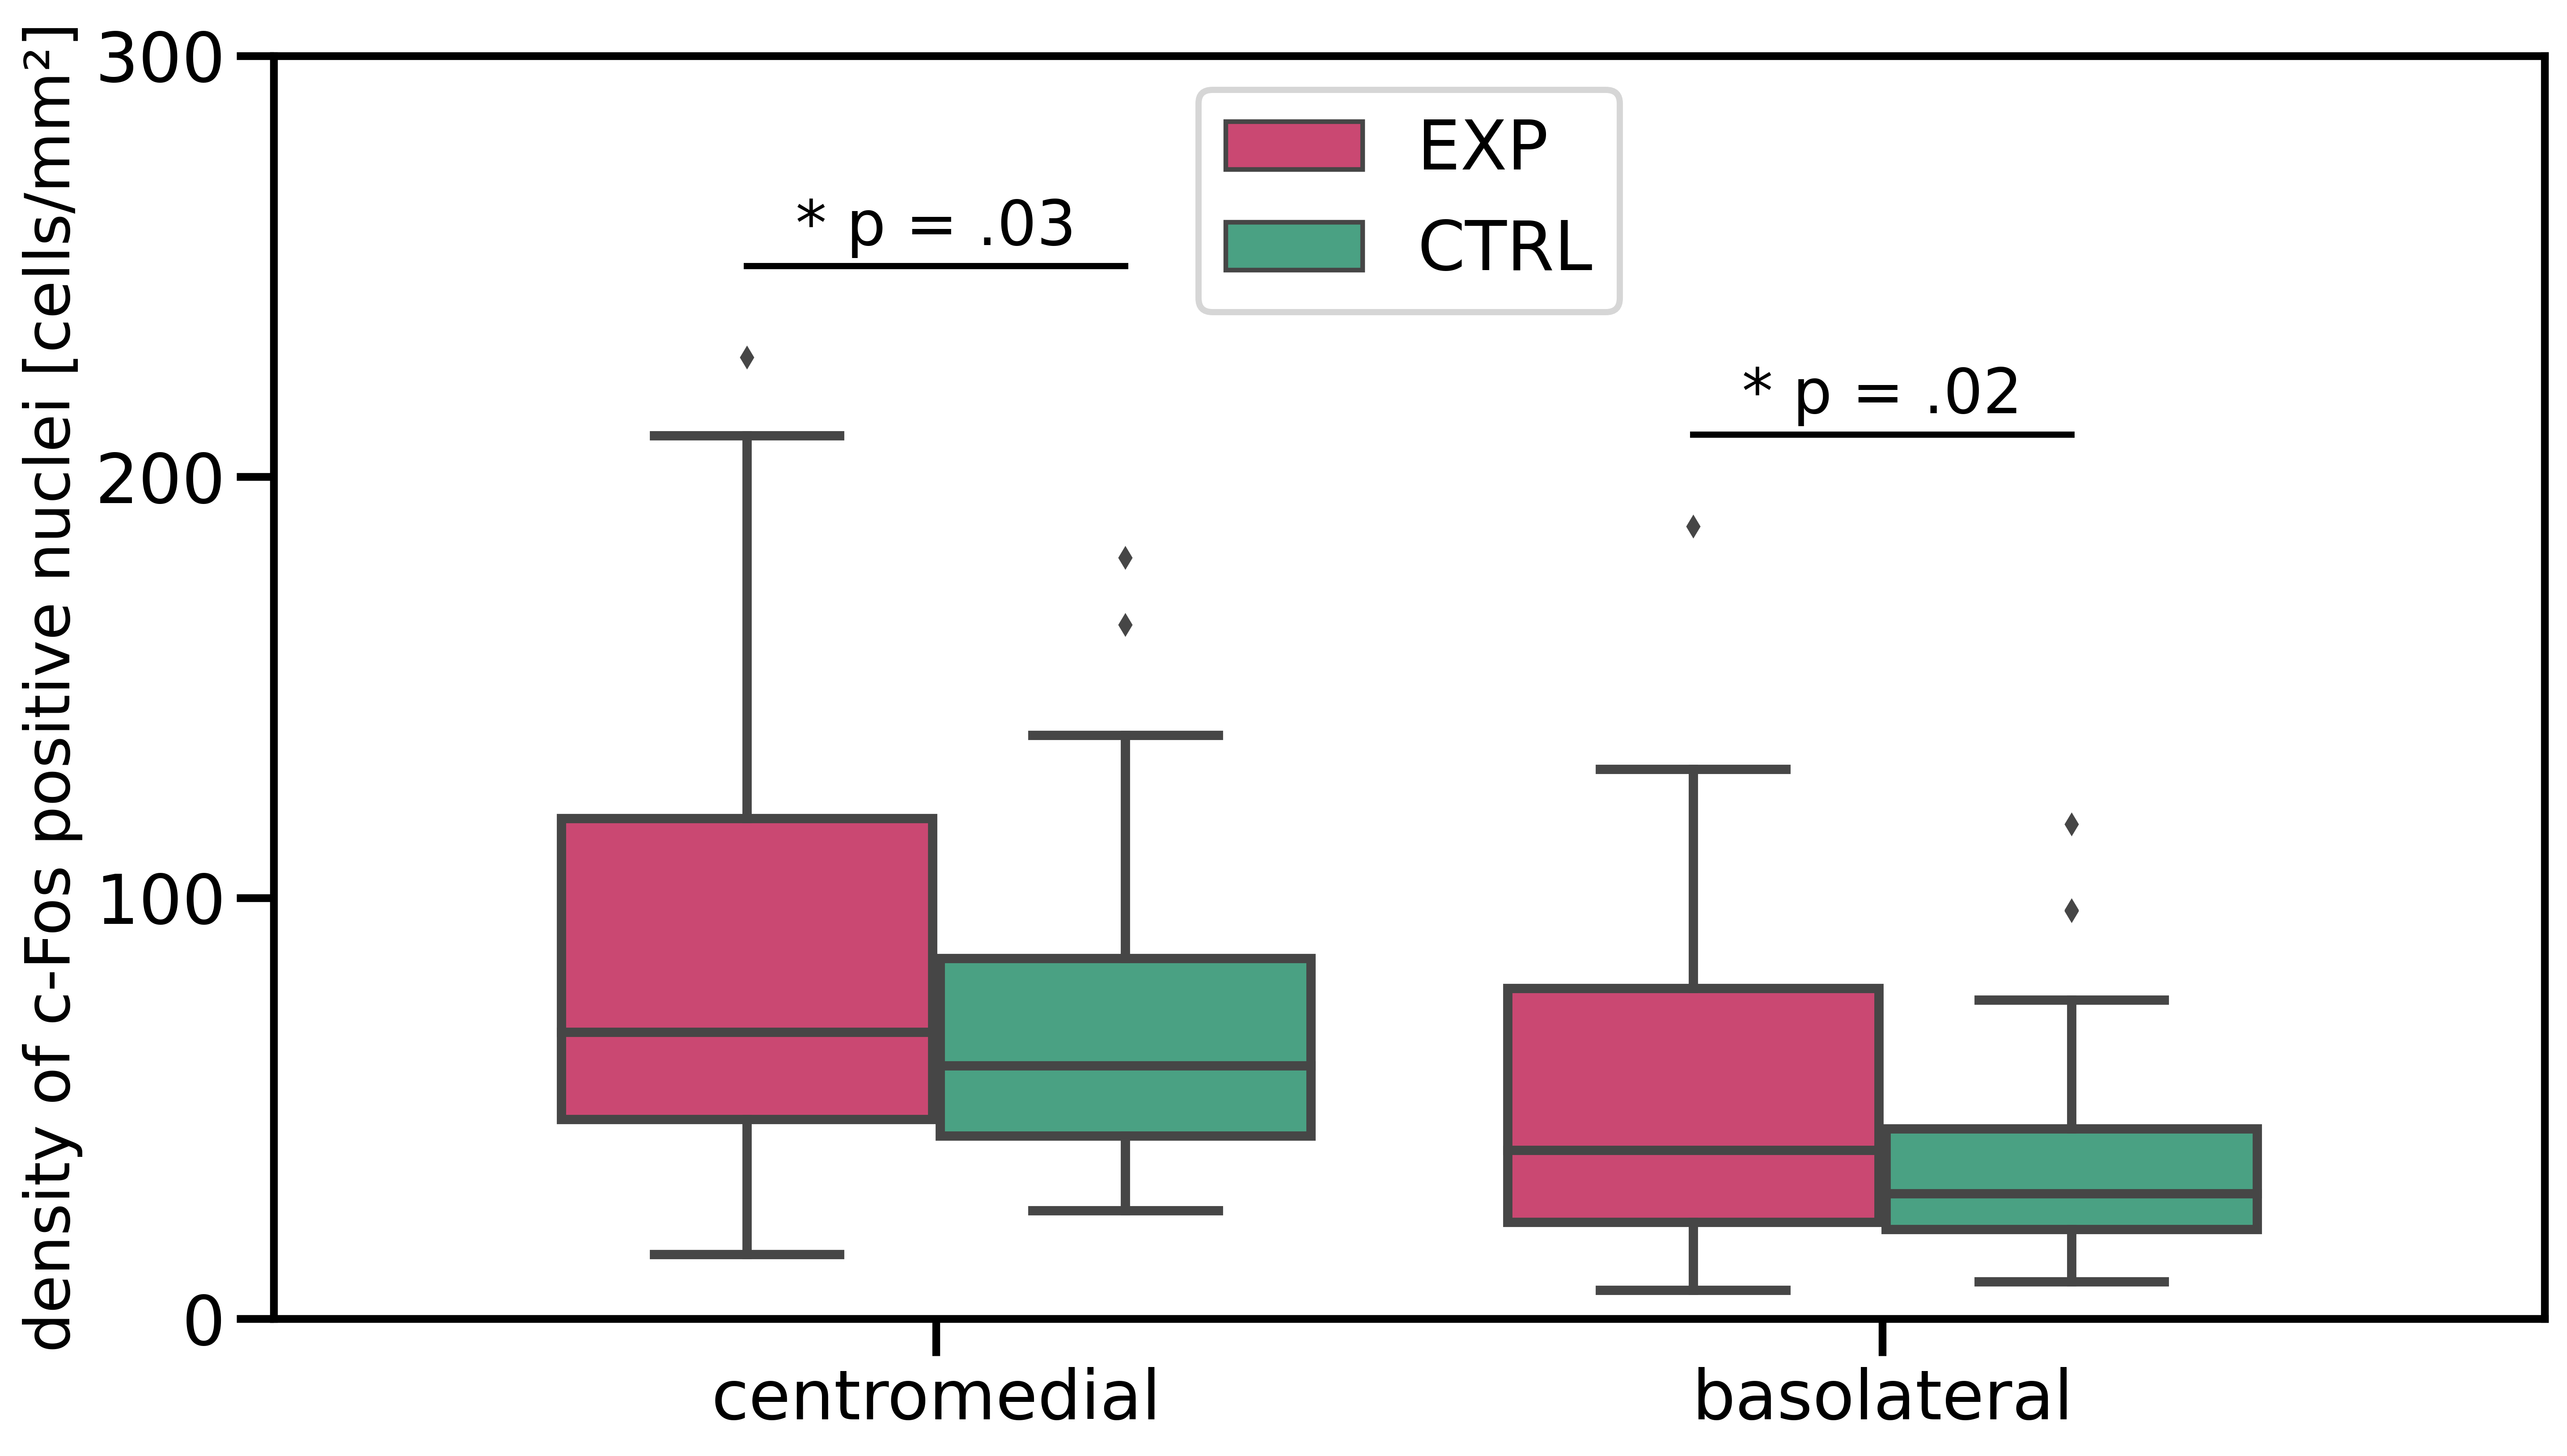

In [38]:
plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

ax = seaborn.boxplot(x="Nucleus", y="Density", hue="Group", hue_order=["EXP", "CTRL"],
                     data=summed_df, order=['centromedial', 'basolateral'], palette=pal_1, fliersize = 4)

plt.xlabel("")#"part of the amygdala", fontsize=18)
plt.ylabel("density of c-Fos positive nuclei [cells/mm\u00b2]".format(area), fontsize=20)
plt.xticks(fontsize=22, ticks=[0,1], labels=['centromedial', 'basolateral'])
plt.yticks(fontsize=22)

plt.legend(loc = 'upper center')

plt.plot([-0.2,-0.2,0.2,0.2], [250,250,250,250], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((-0.2+0.2)*.5, 250+2, "* p = .03", ha='center', va='bottom', color='k', fontsize=20)
plt.plot([0.8,0.8,1.2,1.2], [210, 210, 210, 210], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((0.8+1.2)*.5, 210+2, "* p = .02", ha='center', va='bottom', color='k', fontsize=20)


plt.ylim(0,300)
plt.yticks([0, 100, 200, 300])

plt.tight_layout()
plt.savefig('wykresy/boxplot_baso_centro.tiff')
plt.show()

In [117]:
# create a table for analysis in R

grupy = ['EXP', 'CON']
osoby = ['AG', 'AH', 'AK', 'KG', 'KL', 'KT', 'RK', 'RP', 'TJ']
nucleusy = ['LA', 'BA', 'CeL', 'CeM', 'ME']
ordery = ['o', 'n']
skrawki = ['1', '2', '3', '4']

df_all_data_stats = pd.DataFrame()

for osoba in osoby:
    for grupa in grupy:
        for nucleus in nucleusy:
            for order in ordery:
                for skrawek in skrawki:
                    
                    znacznik_grupy = 0
                    if grupa == 'EXP':
                        znacznik_grupy = 2
                    elif grupa == 'CON':
                        znacznik_grupy = 1

                    id_str = osoba + str(znacznik_grupy) + order + '_' + skrawek + '.tif_' + nucleus
                    x = df_all_data[df_all_data.ID.str.contains(id_str, regex=True)]
                    
                    value = next(iter(x['Density'].values), None)
                    
                    code = osoba + '_' + grupa + '_' + order
                    
                    category = grupa + '_' + nucleus


                    data=OrderedDict({'ID': code, 'Code': osoba, 'Group': grupa, 'Nulceus': nucleus, 'Category': category, 'Order': order, 'Skrawek': skrawek, 'Density': value})
                    df_temporary = pd.DataFrame([data])
                    df_all_data_stats = df_all_data_stats.append(df_temporary)
                    df_all_data_stats = df_all_data_stats.fillna(np.nan)

df_all_data_stats.to_excel('all_data_stats.xlsx')                    
df_all_data_stats.head()

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats = df_all_data_stats.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/809687028.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

,ID,Code,Group,Nulceus,Category,Order,Skrawek,Density
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,1,73.705179
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,2,NaN
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,3,111.811024
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,4,NaN
0,AG_EXP_n,AG,EXP,LA,EXP_LA,n,1,22.491349


In [62]:
# create a table for df_plot

osoby = ['AG', 'AH', 'AK', 'KG', 'KL', 'KT', 'RK', 'RP', 'TJ']
grupy = ['1', '2']
ordery = ['o', 'n']
skrawki = ['1', '2', '3', '4']
nucleusy = ['LA', 'BA', 'CeL', 'CeM', 'ME']

df_all_data_stats3 = pd.DataFrame()

for osoba in osoby:
    for order in ordery:
        for skrawek in skrawki:

            x_exp_LA = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'LA', regex=True)]
            x_contr_LA = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'LA', regex=True)]
                
            value_exp_LA = next(iter(x_exp_LA['Density'].values), None)
            value_contr_LA = next(iter(x_contr_LA['Density'].values), None)
            
            
            x_exp_BA = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'BA', regex=True)]
            x_contr_BA = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'BA', regex=True)]
                
            value_exp_BA = next(iter(x_exp_BA['Density'].values), None)
            value_contr_BA = next(iter(x_contr_BA['Density'].values), None)
            
            
            x_exp_CeL = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'CeL', regex=True)]
            x_contr_CeL = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'CeL', regex=True)]
                
            value_exp_CeL = next(iter(x_exp_CeL['Density'].values), None)
            value_contr_CeL = next(iter(x_contr_CeL['Density'].values), None)
            
            
            x_exp_CeM = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'CeM', regex=True)]
            x_contr_CeM = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'CeM', regex=True)]
                
            value_exp_CeM = next(iter(x_exp_CeM['Density'].values), None)
            value_contr_CeM = next(iter(x_contr_CeM['Density'].values), None)
            
            
            x_exp_ME = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'ME', regex=True)]
            x_contr_ME = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'ME', regex=True)]
                
            value_exp_ME = next(iter(x_exp_ME['Density'].values), None)
            value_contr_ME = next(iter(x_contr_ME['Density'].values), None)
                

            data=OrderedDict({'Code': osoba, 'Order': order, 'Skrawek': skrawek, 'Density_EXP_LA': value_exp_LA, 'Density_EXP_BA': value_exp_BA, 'Density_EXP_CeL': value_exp_CeL, 'Density_EXP_CeM': value_exp_CeM,'Density_EXP_ME': value_exp_ME,
                             'Density_CONTR_LA': value_contr_LA, 'Density_CONTR_BA': value_contr_BA, 'Density_CONTR_CeL': value_contr_CeL, 'Density_CONTR_CeM': value_contr_CeM, 'Density_CONTR_ME': value_contr_ME})
            df_temporary = pd.DataFrame([data])
            df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
            df_all_data_stats3 = df_all_data_stats3.fillna(np.nan)

df_all_data_stats3.to_csv('eksport_tabelek/all_data_stats3.csv')
df_all_data_stats3.to_excel('eksport_tabelek/all_data_stats3.xlsx')

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_89462/528828054.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas

In [63]:
df_all_data_stats3.head(10)

,Code,Order,Skrawek,Density_EXP_LA,Density_EXP_BA,Density_EXP_CeL,Density_EXP_CeM,Density_EXP_ME,Density_CONTR_LA,Density_CONTR_BA,Density_CONTR_CeL,Density_CONTR_CeM,Density_CONTR_ME
0,AG,o,1,73.705179,50.881612,122.315593,70.110701,129.339039,28.846154,47.368421,78.853047,34.433286,105.060241
0,AG,o,2,NaN,84.946237,100.158983,68.661972,163.883090,NaN,61.247216,76.519916,49.136786,156.318481
0,AG,o,3,111.811024,67.368421,151.069519,94.827586,70.616604,NaN,22.199798,55.806938,41.543027,80.787508
0,AG,o,4,NaN,68.010076,126.488095,86.900130,120.092379,42.525773,77.194753,120.833333,22.522523,101.703665
0,AG,n,1,22.491349,38.663172,48.543689,13.333333,48.747764,NaN,30.848329,58.631922,42.889391,106.747231
0,AG,n,2,20.618557,39.154268,38.461538,25.454545,99.547511,21.459227,43.002915,99.406528,40.511727,77.167499
0,AG,n,3,50.000000,99.635480,165.596919,116.279070,NaN,30.373832,29.098652,70.562293,21.592443,82.590612
0,AG,n,4,NaN,NaN,NaN,NaN,NaN,NaN,53.571429,103.756708,109.640832,126.582278
0,AH,o,1,NaN,NaN,NaN,NaN,NaN,13.297872,18.799711,25.029797,35.769829,68.032187
0,AH,o,2,NaN,NaN,NaN,NaN,NaN,20.325203,37.580202,61.224490,48.177083,78.481013


In [74]:
# create df_plot based on df_all_data_stats3 - data from every single section

df_plot = pd.melt(df_all_data_stats3, id_vars=['Code'], value_vars=['Density_EXP_LA', 'Density_EXP_BA', 'Density_EXP_CeL', 
                                                   'Density_EXP_CeM', 'Density_EXP_ME',
                                                  'Density_CONTR_LA', 'Density_CONTR_BA', 'Density_CONTR_CeL', 
                                                   'Density_CONTR_CeM', 'Density_CONTR_ME'])

def nucleus_from_row(row):
    return row['variable'].split('_')[-1]

def group_from_row(row):
    return row['variable'].split('_')[-2]

df_plot['Jądro ciała migdałowatego'] = df_plot.apply(nucleus_from_row, axis=1)

df_plot['Grupa'] = df_plot.apply(group_from_row, axis=1)

df_plot = df_plot.rename(columns={"value": "Gęstość występowania wybarwionych komórek"})
df_plot = df_plot.replace(["LA", "BA", "CeL", "CeM", "ME"], ["boczne", "podstawne", "środkowo-boczne", "środkowe", "przyśrodkowe"])
df_plot = df_plot.replace(["EXP", "CONTR"], ["gr. eksperymentalna", "gr. kontrolna"])
df_plot.head(10)

,Code,variable,Gęstość występowania wybarwionych komórek,Jądro ciała migdałowatego,Grupa
0,AG,Density_EXP_LA,73.705179,boczne,gr. eksperymentalna
1,AG,Density_EXP_LA,NaN,boczne,gr. eksperymentalna
2,AG,Density_EXP_LA,111.811024,boczne,gr. eksperymentalna
3,AG,Density_EXP_LA,NaN,boczne,gr. eksperymentalna
4,AG,Density_EXP_LA,22.491349,boczne,gr. eksperymentalna
5,AG,Density_EXP_LA,20.618557,boczne,gr. eksperymentalna
6,AG,Density_EXP_LA,50.000000,boczne,gr. eksperymentalna
7,AG,Density_EXP_LA,NaN,boczne,gr. eksperymentalna
8,AH,Density_EXP_LA,NaN,boczne,gr. eksperymentalna
9,AH,Density_EXP_LA,NaN,boczne,gr. eksperymentalna


In [105]:
sem_data = df_plot.groupby(["Jądro ciała migdałowatego", "Grupa"])["Gęstość występowania wybarwionych komórek"].sem()
print(sem_data)
sem_data = sem_data.values

Jądro ciała migdałowatego  Grupa              
boczne                     gr. eksperymentalna    13.166885
                           gr. kontrolna           4.413940
podstawne                  gr. eksperymentalna     7.297327
                           gr. kontrolna           5.017109
przyśrodkowe               gr. eksperymentalna    11.316667
                           gr. kontrolna           7.495462
środkowe                   gr. eksperymentalna     9.340781
                           gr. kontrolna           7.466446
środkowo-boczne            gr. eksperymentalna    12.889105
                           gr. kontrolna           9.549231
Name: Gęstość występowania wybarwionych komórek, dtype: float64


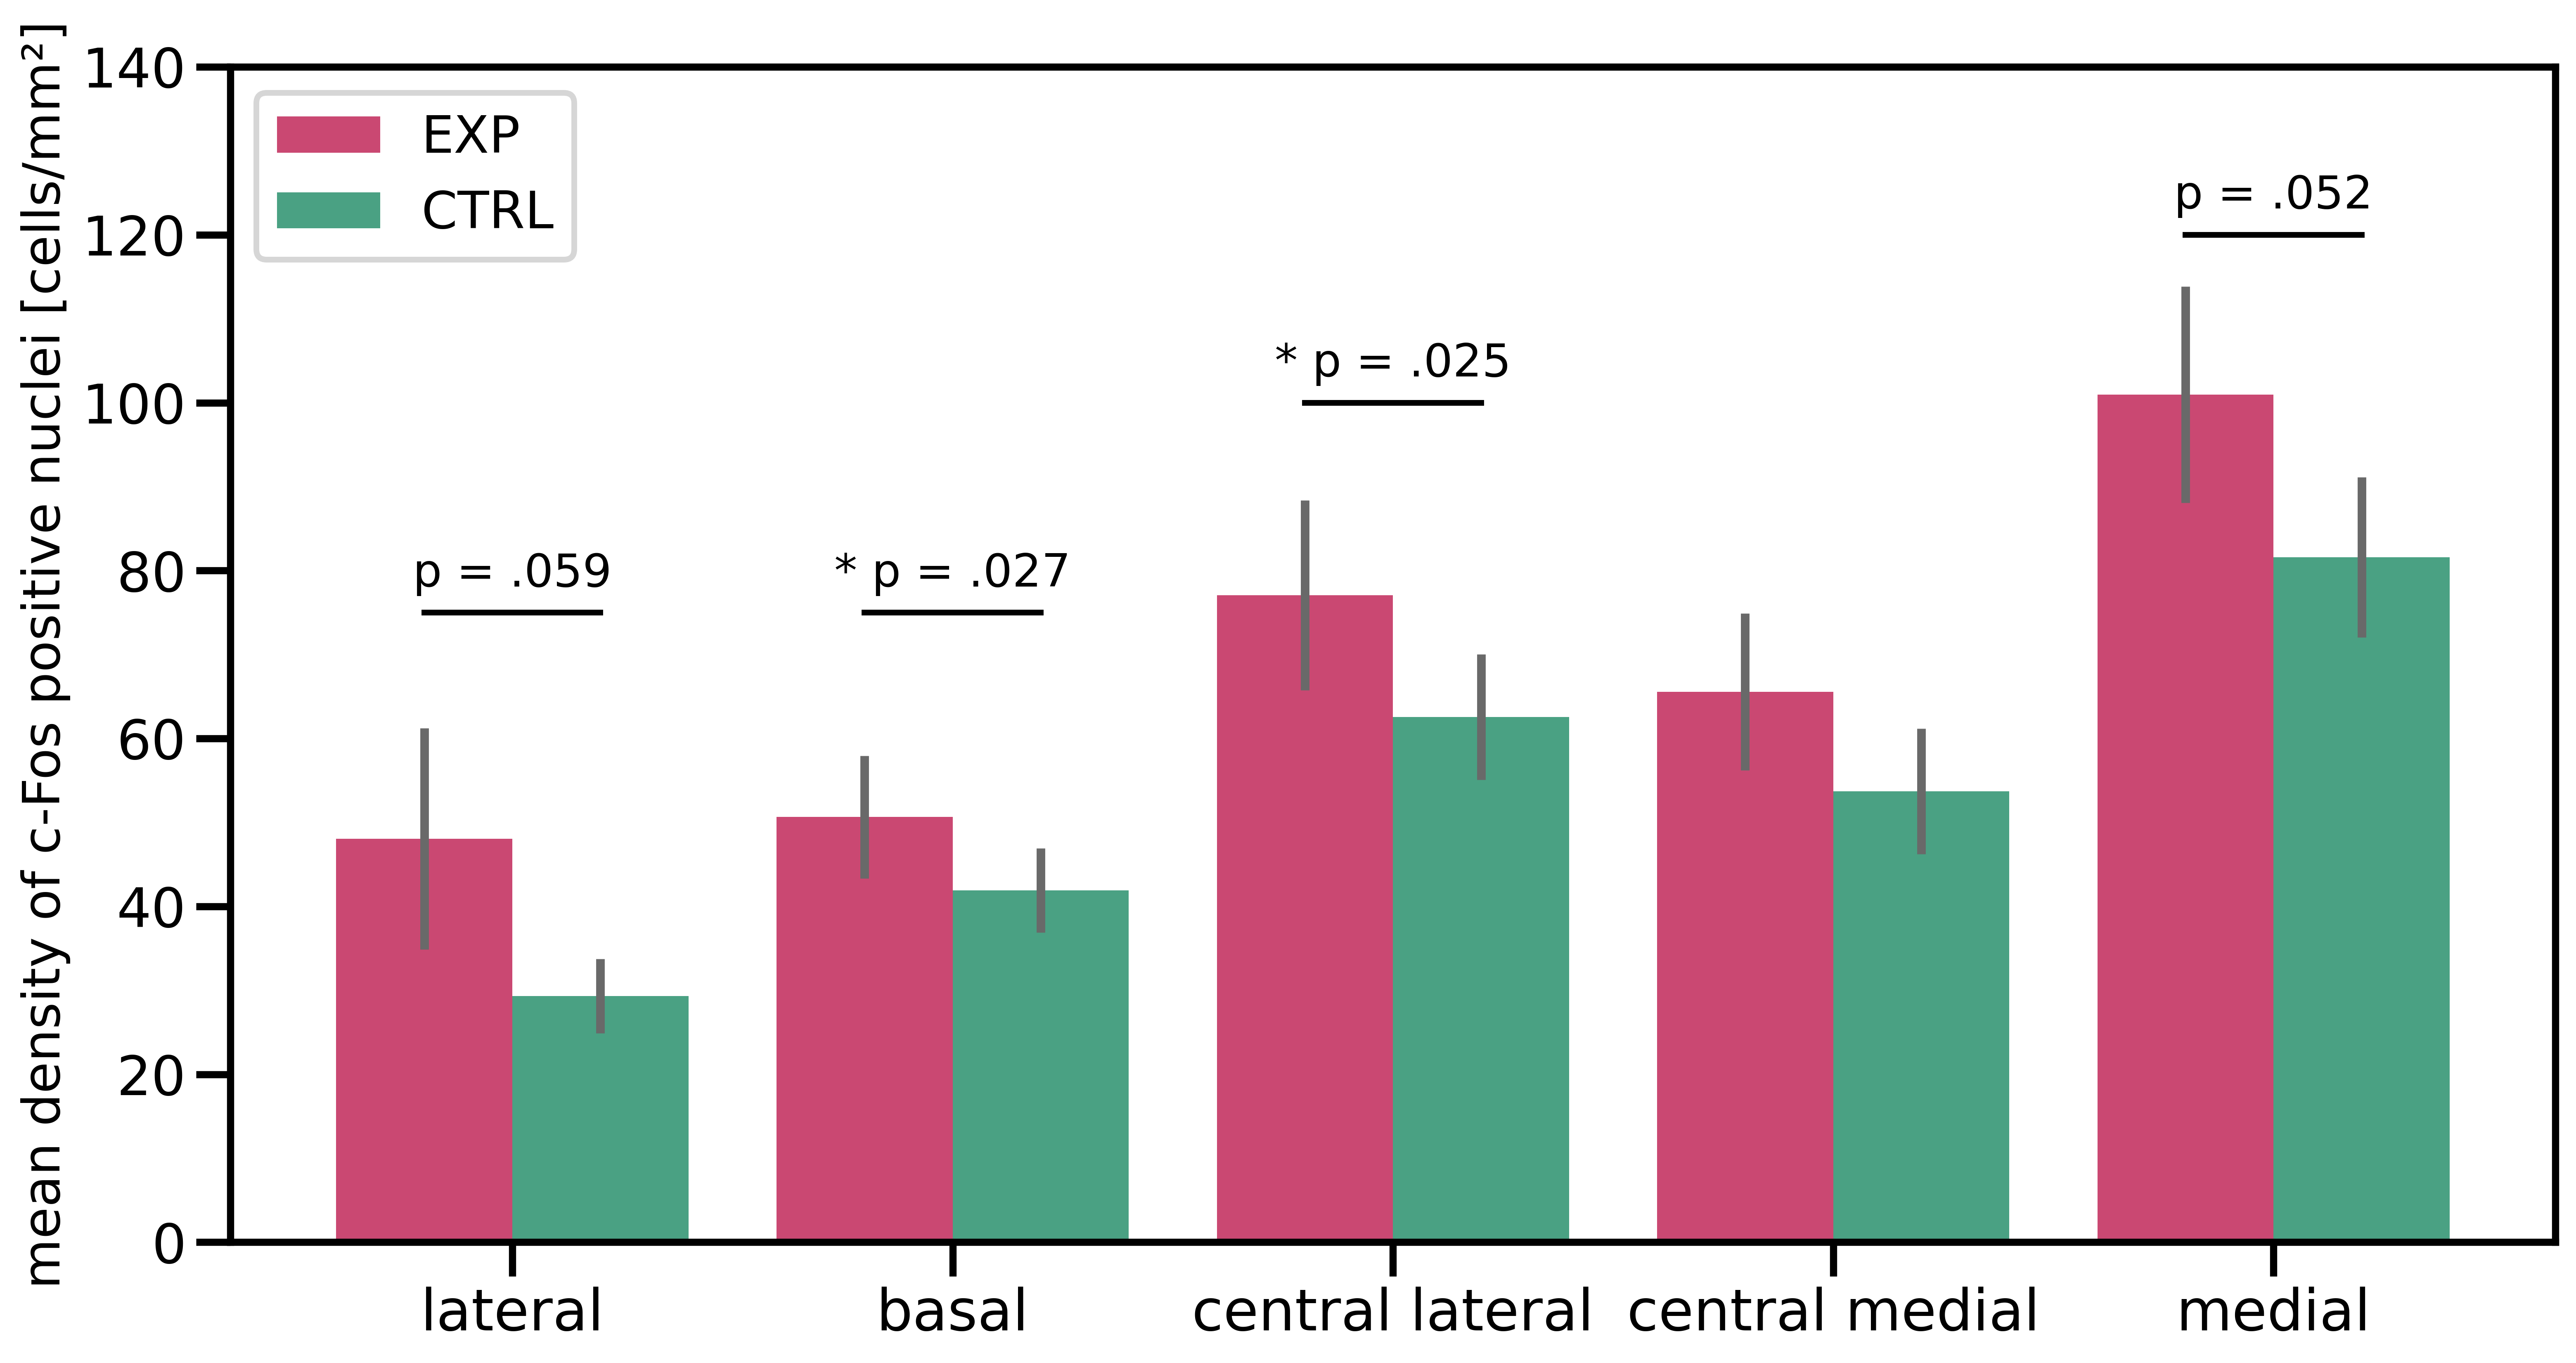

In [120]:
# plot based on data from every single section

plt.figure(figsize=(13, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

ax = seaborn.barplot(x="Jądro ciała migdałowatego", y="Gęstość występowania wybarwionych komórek", hue="Grupa", 
                     data=df_plot, palette=pal_1, errorbar=None, errwidth=1)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, sem_data, fmt=' ', ecolor='dimgray')

plt.legend(loc="upper left", fontsize=18, labels=['EXP','CTRL'])
#ax.get_legend().remove() # gdyby chcieć wyrzucić legendę
plt.xlabel("")
plt.ylabel("mean density of c-Fos positive nuclei [cells/mm\u00b2]".format(area), fontsize=18)
plt.xticks(fontsize=20, ticks=[0,1,2,3,4], labels=['lateral', 'basal', 'central lateral', 'central medial', 'medial'])
plt.yticks(fontsize=19)

plt.plot([0.8,0.8,1.2,1.2], [75,75,75,75], linewidth=2, color='k') 
plt.text((1+1)*.5, 75+2, "* p = .027", ha='center', va='bottom', color='k', fontsize=16)

plt.plot([1.8,1.8,2.2,2.2], [100,100,100,100], linewidth=2, color='k') 
plt.text((2+2)*.5, 100+2, "* p = .025", ha='center', va='bottom', color='k', fontsize=16)

plt.plot([-0.2,-0.2,0.2,0.2], [75,75,75,75], linewidth=2, color='k') 
plt.text((0+0)*.5, 75+2, "p = .059", ha='center', va='bottom', color='k', fontsize=16)

plt.plot([3.8,3.8,4.2,4.2], [120,120,120,120], linewidth=2, color='k')
plt.text((4+4)*.5, 120+2, "p = .052", ha='center', va='bottom', color='k', fontsize=16)

plt.yticks(np.arange(0,141,20))

plt.tight_layout()
plt.savefig('wykresy/means_across_nuclei_single_observation_based_ang.tiff')
plt.show()

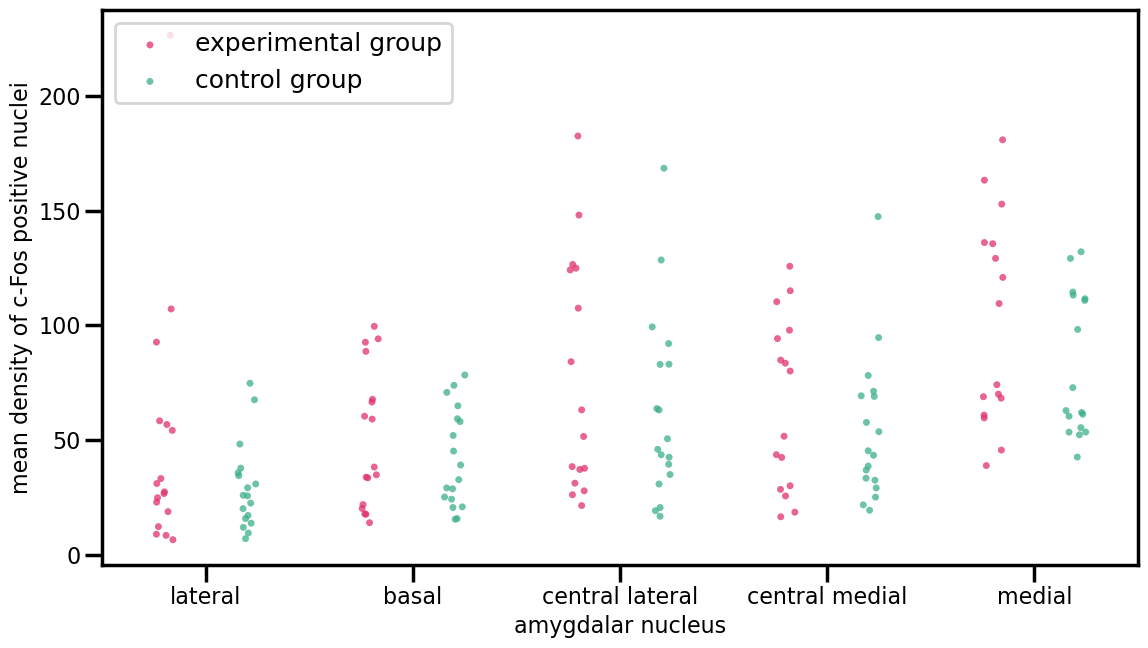

In [91]:
# catplot na podstawie danych z pojedynczych obserwacji - wersja ang

plt.figure(figsize=(12, 7))
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

seaborn.stripplot(x="Jądro ciała migdałowatego", y="Gęstość występowania wybarwionych komórek", hue="Grupa", 
                data=df_plot, palette=pal_1, alpha = 0.75, dodge=True)

plt.legend(loc="upper left", fontsize=18, labels=['experimental group','control group'])
plt.xlabel("amygdalar nucleus", fontsize=16)
plt.ylabel("mean density of c-Fos positive nuclei", fontsize=16)
plt.xticks(fontsize=16, ticks=[0,1,2,3,4], labels=['lateral', 'basal', 'central lateral', 'central medial', 'medial'])
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('wykresy/observations_across_nuclei_single_observation_based_ang.png')
plt.show()

In [84]:
sem_data_allnuclei = df_plot.groupby(["Grupa"])["Gęstość występowania wybarwionych komórek"].sem()
print(sem_data_allnuclei)
reversed_sem_data_allnuclei=list(reversed(sem_data_allnuclei)) #bo chcemy na wykresie mieć najpierw gr. kontrolną
sem_data_allnuclei = sem_data_allnuclei.values
print(sem_data_allnuclei)

Grupa
gr. eksperymentalna    3.350298
gr. kontrolna          2.367515
Name: Gęstość występowania wybarwionych komórek, dtype: float64
[3.35029755 2.36751522]


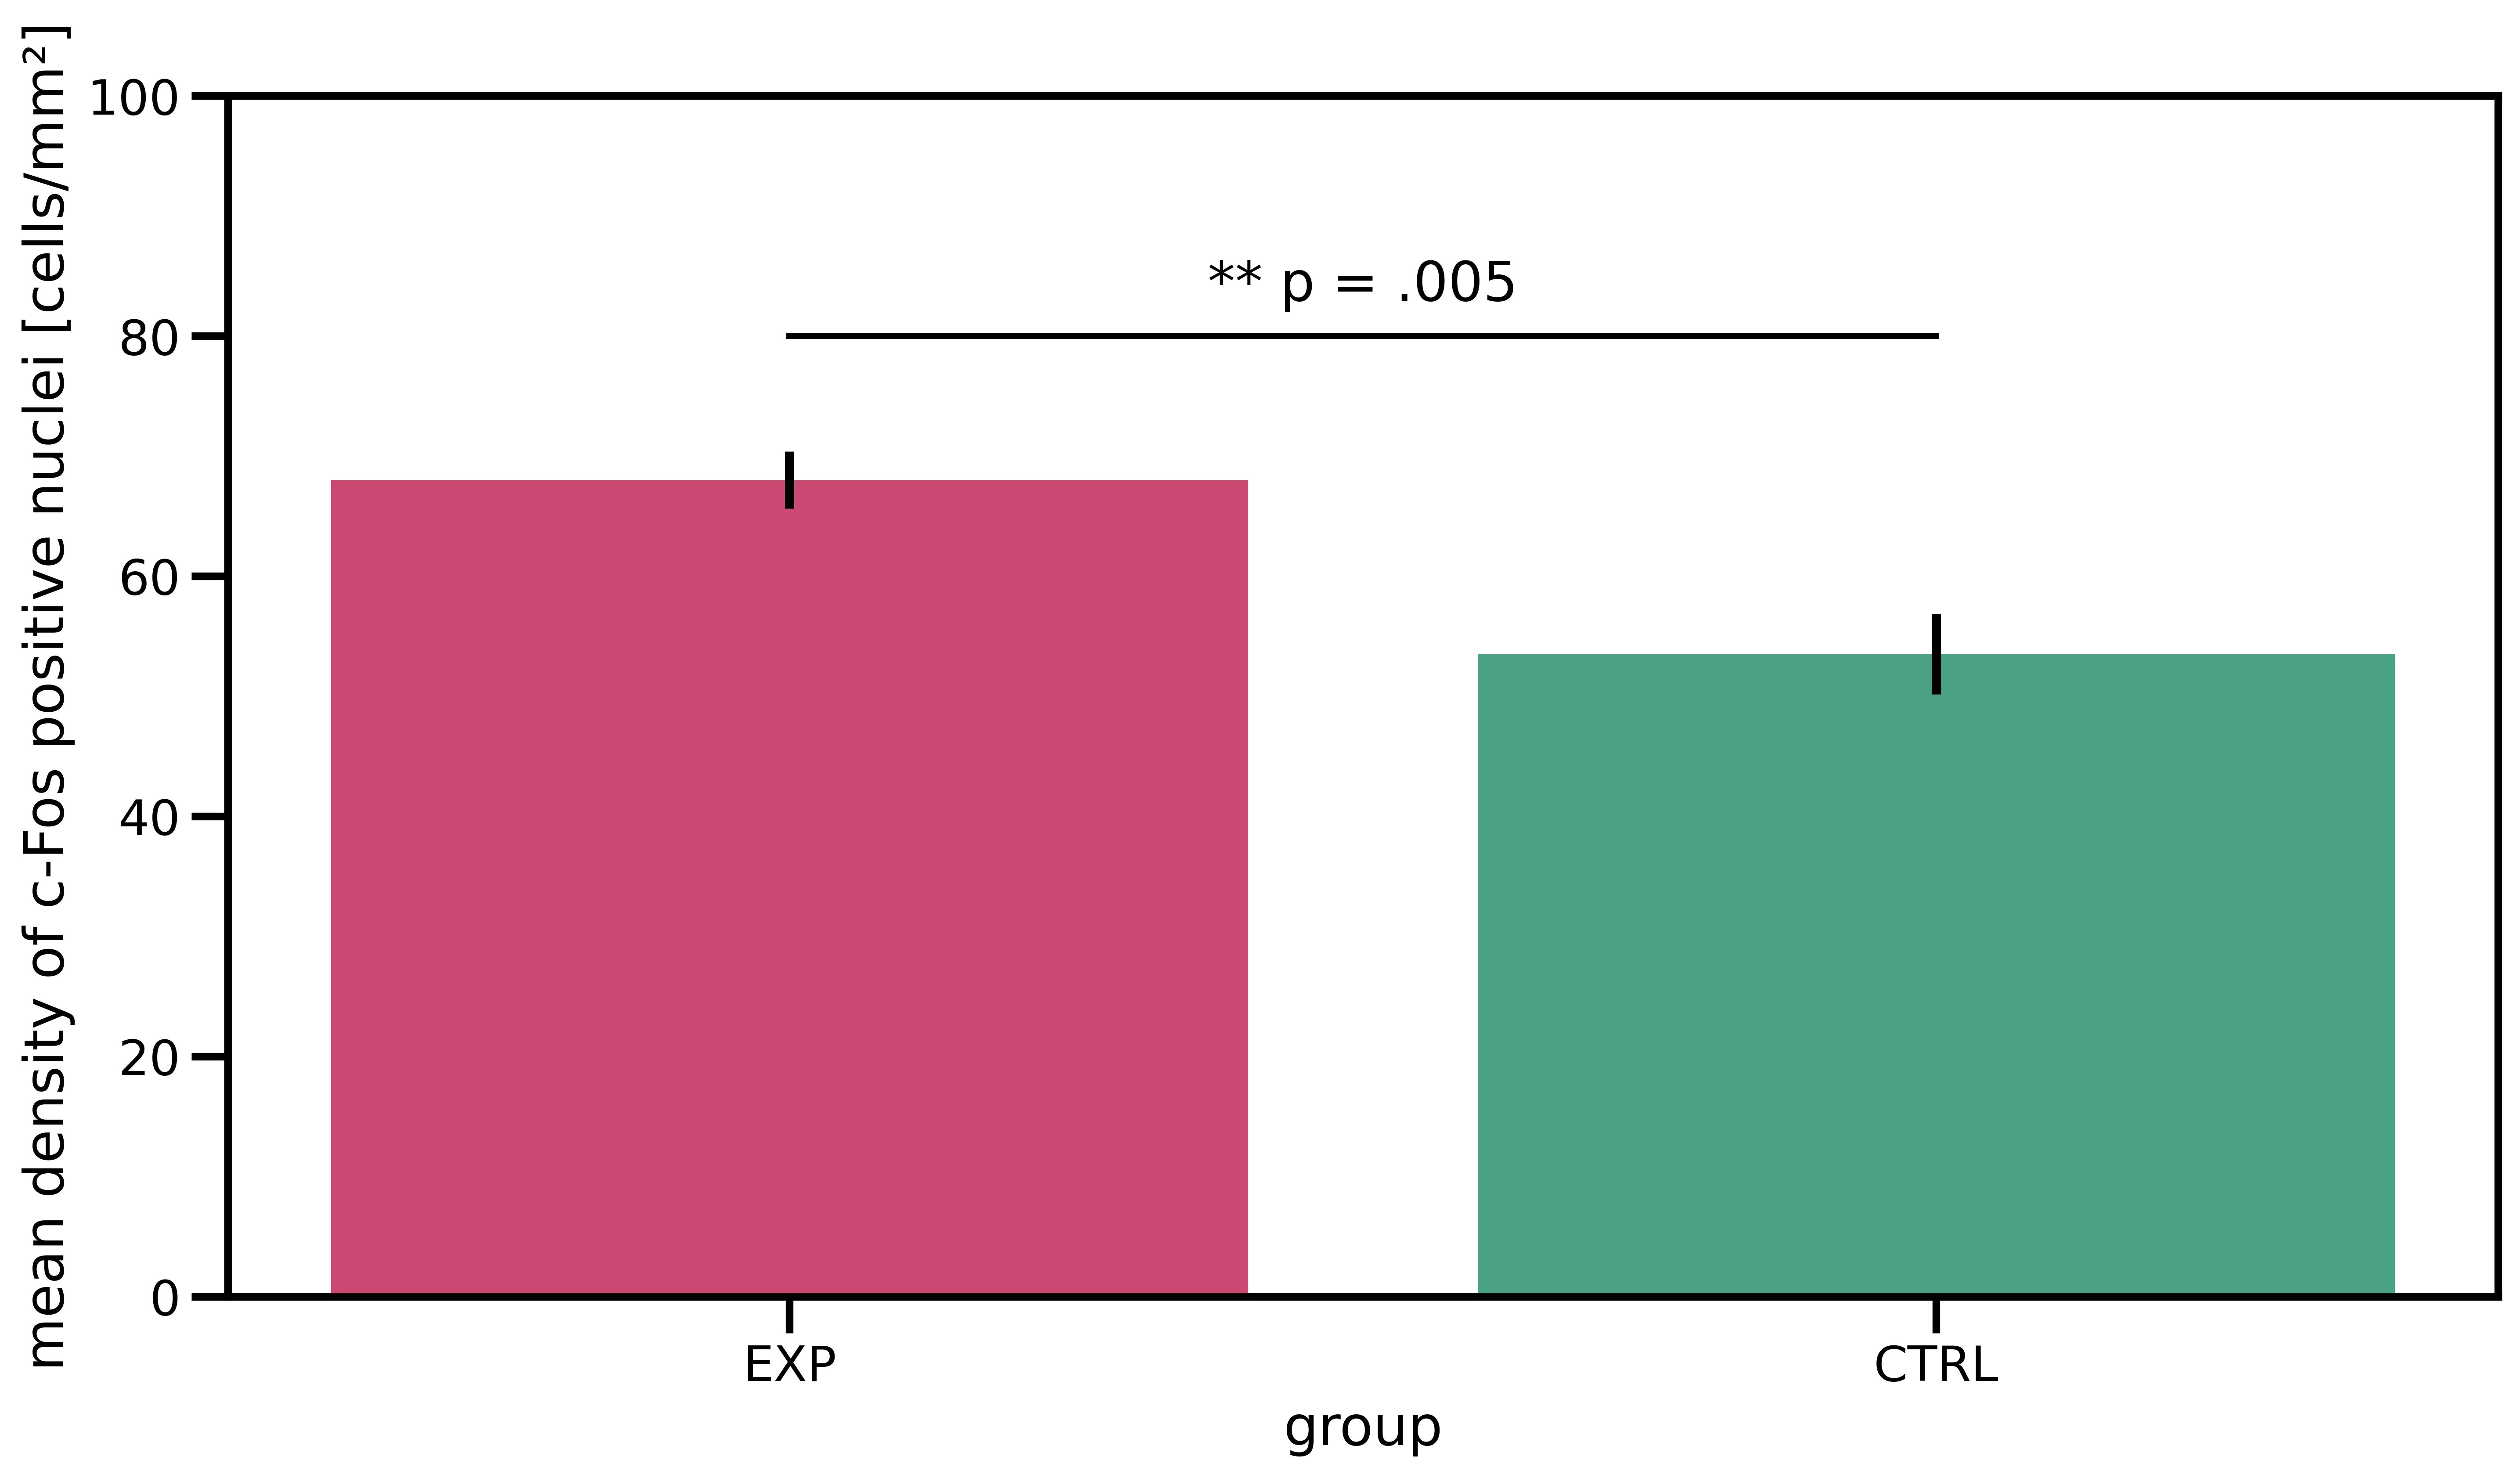

In [93]:
# plot na podstawie danych z pojedynczych obserwacji - ang

plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

ax = seaborn.barplot(x="Grupa", y="Gęstość występowania wybarwionych komórek", 
                     data=df_plot, order=['gr. eksperymentalna', 'gr. kontrolna'], palette=pal_1, 
                     errorbar=None, errwidth=1)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, reversed_sem_data_allnuclei, fmt=' ', ecolor='black')

plt.xlabel("group", fontsize=18)
plt.ylabel("mean density of c-Fos positive nuclei [cells/mm\u00b2]".format(area), fontsize=18)
plt.xticks(fontsize=16, ticks=[0,1], labels=['EXP', 'CTRL'])
plt.yticks(fontsize=16)

plt.plot([0,0,1,1], [80,80,80,80], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((0+1)*.5, 80+2, "** p = .005", ha='center', va='bottom', color='k', fontsize = 18)

plt.yticks(np.arange(0,101,20))

plt.tight_layout()

plt.savefig('wykresy/group_means_single_observation_based_ang.tiff')
plt.show()